In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util

%matplotlib inline

In [92]:
reload(trig_poly)
reload(dual_certificates)
reload(test_data)

N = 8
fc = 30
min_separation = 0.5 / N

gammas = [0.247, 0.339, 0.414]
kernel = trig_poly.TrigPoly.dirichlet(fc)
gamma_kernel = trig_poly.TrigPoly.multi_dirichlet(fc, gammas)

support = test_data.uniform_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_1d(N)

interpolator_1 = dual_certificates.interpolate(support, sign_pattern, kernel)
interpolator_2 = dual_certificates.interpolate_with_derivative(support, sign_pattern, kernel)
interpolator_3 = dual_certificates.interpolate_with_derivative(support, sign_pattern, gamma_kernel)

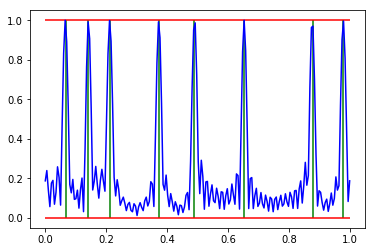

In [93]:
plt_util.plot_trig_poly_magnitude(interpolator_1)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [18]:
support[0] - support[-1] + 1.0

0.044383023981430236

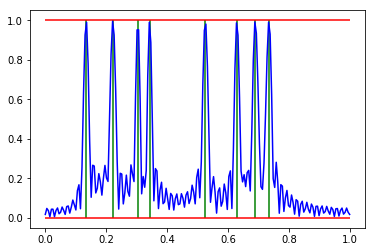

In [4]:
plt_util.plot_trig_poly_magnitude(interpolator_2)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

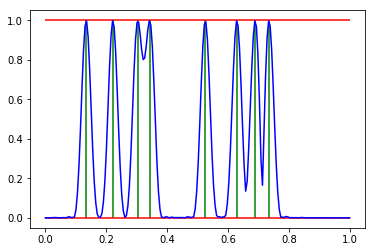

In [5]:
plt_util.plot_trig_poly_magnitude(interpolator_3)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [8]:
reload(dual_certificates)
print dual_certificates.validate(support, sign_pattern, interpolator_1)

{'status': False, 'values_achieved': True, 'bound_achieved': False}


# Phase Transition

In [14]:
import phase_transition
from matplotlib import pyplot as plt

In [36]:
reload(phase_transition)
reload(dual_certificates)

fc = 30

probs = phase_transition.grid_probabilities(
    test_data.uniform_supports,
    test_data.uniform_sign_pattern_1d,
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_with_derivative,
    range(2, 31),
    np.linspace(0.0, 1.0, 30) / float(fc),
    num_experiments=10)

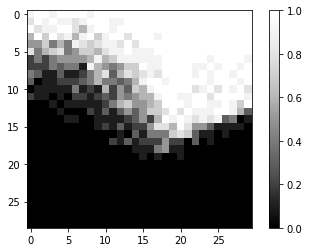

In [37]:
plt.imshow(probs, cmap='Greys_r', vmin=0.0, vmax=1.0)
plt.colorbar()